# 1. Overview

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('csv/sold.csv')
df.head()

,BOROUGH,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Latitude,Longitude,Clean Address,Match
0,2,1667 WASHINGTON AVENUE,10457.0,3167.0,1899.0,980000,44812,40.841270,-73.901313,1667 WASHINGTON AVENUE,0
1,2,410 EAST 179TH STREET,10457.0,2048.0,1901.0,655000,44866,40.850353,-73.898824,410 EAST 179TH STREET,0
2,2,4455 PARK AVENUE,10457.0,1587.0,1899.0,520000,44860,40.853630,-73.895963,4455 PARK AVENUE,0
3,2,443 EAST 180 STREET,10457.0,2820.0,1952.0,720000,44615,40.851764,-73.896429,443 EAST 180 STREET,0
4,2,2327 WASHINGTON AVE,10458.0,1260.0,1910.0,499999,44679,40.855949,-73.892532,2327 WASHINGTON AVE,0


* SALE DATE is not in the right format. We will convert it to year-month-day.

In [3]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], unit='D', origin='1900-01-01')

In [4]:
df.head()

,BOROUGH,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Latitude,Longitude,Clean Address,Match
0,2,1667 WASHINGTON AVENUE,10457.0,3167.0,1899.0,980000,2022-09-10,40.841270,-73.901313,1667 WASHINGTON AVENUE,0
1,2,410 EAST 179TH STREET,10457.0,2048.0,1901.0,655000,2022-11-03,40.850353,-73.898824,410 EAST 179TH STREET,0
2,2,4455 PARK AVENUE,10457.0,1587.0,1899.0,520000,2022-10-28,40.853630,-73.895963,4455 PARK AVENUE,0
3,2,443 EAST 180 STREET,10457.0,2820.0,1952.0,720000,2022-02-25,40.851764,-73.896429,443 EAST 180 STREET,0
4,2,2327 WASHINGTON AVE,10458.0,1260.0,1910.0,499999,2022-04-30,40.855949,-73.892532,2327 WASHINGTON AVE,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92208 entries, 0 to 92207
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BOROUGH            92208 non-null  int64         
 1   ADDRESS            92208 non-null  object        
 2   ZIP CODE           92208 non-null  float64       
 3   GROSS SQUARE FEET  48612 non-null  float64       
 4   YEAR BUILT         86939 non-null  float64       
 5   SALE PRICE         92208 non-null  int64         
 6   SALE DATE          92208 non-null  datetime64[ns]
 7   Latitude           90981 non-null  float64       
 8   Longitude          90981 non-null  float64       
 9   Clean Address      92208 non-null  object        
 10  Match              92208 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 7.7+ MB


* BOROUGH, ADDRESS, ZIP CODE, SALE PRICE, SALE DATE, Clean Addreess and Match have no null values.
* GROSS SQUARE FEET, YEAR BUILT, Latitude and Longitude have considerable null values.

# 2. Distribution

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df.describe()

,BOROUGH,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,Latitude,Longitude,Match
count,92208.000000,92208.000000,4.861200e+04,86939.000000,9.220800e+04,90981.000000,90981.000000,92208.000000
mean,2.934648,10844.646213,5.921191e+03,1953.309079,1.671285e+06,40.709929,-73.932170,0.226770
std,1.295037,567.595769,3.806339e+04,36.879589,1.288970e+07,0.077896,0.099971,0.419133
min,1.000000,10001.000000,0.000000e+00,220.000000,0.000000e+00,40.498966,-74.254937,0.000000
25%,2.000000,10304.000000,1.406000e+03,1925.000000,0.000000e+00,40.655213,-73.985214,0.000000
50%,3.000000,11209.000000,2.000000e+03,1950.000000,5.920000e+05,40.717173,-73.948423,0.000000
75%,4.000000,11355.000000,2.888000e+03,1979.000000,1.100000e+06,40.761304,-73.858638,0.000000
max,5.000000,11697.000000,2.400000e+06,2022.000000,9.310000e+08,40.912869,-73.700913,2.000000


* GROSS SQUARE FEET, YEAR BUILT, SALE PRICE have outliers.

## 2.1 BOROUGH

In [8]:
1 + 3.322 * np.log(92208)

38.97644682095316

Text(0.5, 0, 'Borough')

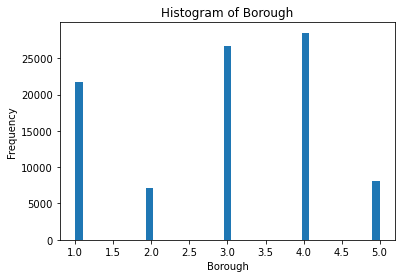

In [9]:
df['BOROUGH'].plot(kind='hist', bins=39, title="Histogram of Borough")  
plt.xlabel('Borough')

## 2.2 ZIP CODE

Text(0.5, 0, 'Zip Code')

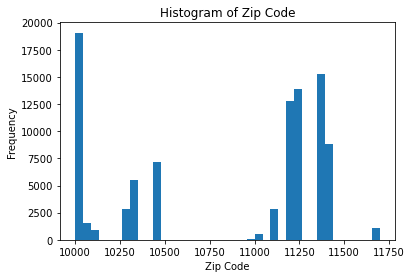

In [10]:
df['ZIP CODE'].plot(kind='hist', bins=39, title="Histogram of Zip Code")  
plt.xlabel('Zip Code')

<AxesSubplot:ylabel='Frequency'>

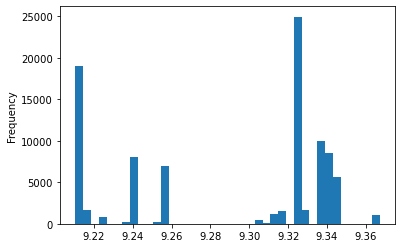

In [11]:
df['ZIP CODE'].map(np.log).plot(kind='hist', bins=39)

## 2.3 GROSS SQUARE FEET

In [12]:
1 + 3.322 * np.log(48612)

36.84978055211507

Text(0.5, 0, 'Gross Square Feet')

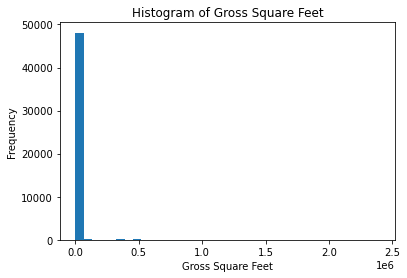

In [13]:
df['GROSS SQUARE FEET'].plot(kind='hist', bins=37, title="Histogram of Gross Square Feet")  
plt.xlabel('Gross Square Feet')

In [14]:
(df['GROSS SQUARE FEET'] == 0).sum()

1080

* GROSS SQUARE FEET has some 0s, so we delete the 0s and make the log plot.
* GROSS SQUARE FEET may have some outliers. We will need to deal with them later.

<AxesSubplot:ylabel='Frequency'>

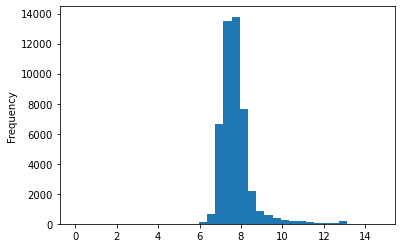

In [15]:
filtered_data = df['GROSS SQUARE FEET'][df['GROSS SQUARE FEET'] > 0]
filtered_data.map(np.log).plot(kind='hist', bins=37)

## 2.4 YEAR BUILT

In [16]:
1 + 3.322 * np.log(86939)

38.78097977161143

Text(0.5, 0, 'Year Built')

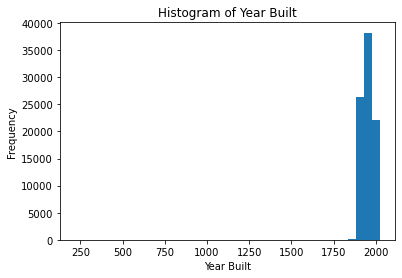

In [17]:
df['YEAR BUILT'].plot(kind='hist', bins=39, title="Histogram of Year Built")  
plt.xlabel('Year Built')

<AxesSubplot:ylabel='Frequency'>

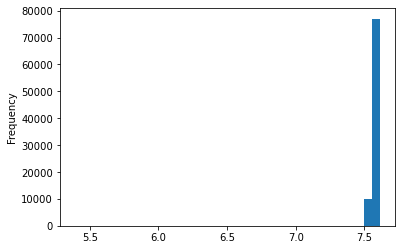

In [18]:
df['YEAR BUILT'].map(np.log).plot(kind='hist', bins=39)

## 2.5 SALE PRICE

Text(0.5, 0, 'Sale Price')

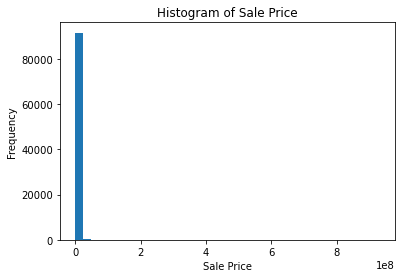

In [19]:
df['SALE PRICE'].plot(kind='hist', bins=39, title="Histogram of Sale Price")  
plt.xlabel('Sale Price')

In [20]:
(df['SALE PRICE'] == 0).sum()

25579

* SALE PRICE has some 0s, so we delete the 0s and make the log plot.
* SALE PRICE may have some outliers. We will need to deal with them later.

<AxesSubplot:ylabel='Frequency'>

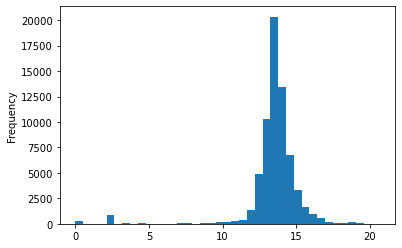

In [21]:
filtered_data = df['SALE PRICE'][df['SALE PRICE'] > 0]
filtered_data.map(np.log).plot(kind='hist', bins=39)

## 2.6 SALE DATE

In [22]:
df['Year'] = df['SALE DATE'].dt.year
df['Month'] = df['SALE DATE'].dt.month
df['Day'] = df['SALE DATE'].dt.day
df['Weekday'] = df['SALE DATE'].dt.weekday 

In [23]:
df.head()

,BOROUGH,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Latitude,Longitude,Clean Address,Match,Year,Month,Day,Weekday
0,2,1667 WASHINGTON AVENUE,10457.0,3167.0,1899.0,980000,2022-09-10,40.841270,-73.901313,1667 WASHINGTON AVENUE,0,2022,9,10,5
1,2,410 EAST 179TH STREET,10457.0,2048.0,1901.0,655000,2022-11-03,40.850353,-73.898824,410 EAST 179TH STREET,0,2022,11,3,3
2,2,4455 PARK AVENUE,10457.0,1587.0,1899.0,520000,2022-10-28,40.853630,-73.895963,4455 PARK AVENUE,0,2022,10,28,4
3,2,443 EAST 180 STREET,10457.0,2820.0,1952.0,720000,2022-02-25,40.851764,-73.896429,443 EAST 180 STREET,0,2022,2,25,4
4,2,2327 WASHINGTON AVE,10458.0,1260.0,1910.0,499999,2022-04-30,40.855949,-73.892532,2327 WASHINGTON AVE,0,2022,4,30,5


Text(0.5, 0, 'Year')

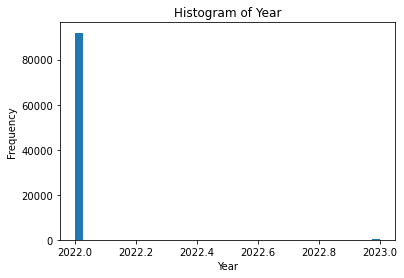

In [24]:
df['Year'].plot(kind='hist', bins=39, title="Histogram of Year")  
plt.xlabel('Year')

In [25]:
(df['Year'] == 2023).sum()

249

Text(0.5, 0, 'Month')

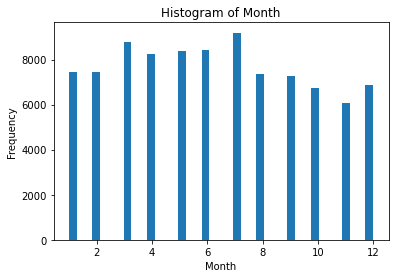

In [26]:
df['Month'].plot(kind='hist', bins=39, title="Histogram of Month")  
plt.xlabel('Month')

* There is no seasonal trend.

Text(0.5, 0, 'Day')

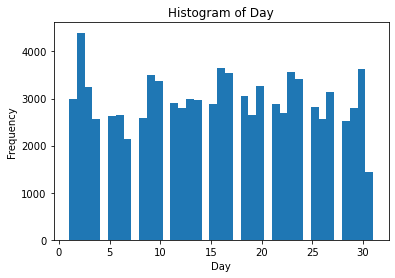

In [27]:
df['Day'].plot(kind='hist', bins=39, title="Histogram of Day")  
plt.xlabel('Day')

Text(0.5, 0, 'Weekday')

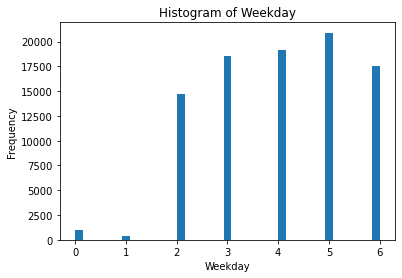

In [28]:
df['Weekday'].plot(kind='hist', bins=39, title="Histogram of Weekday")  
plt.xlabel('Weekday')

* There are a lot fewer sales on Mondays and Tuesdays. Interesting.

## 2.7 Latitude

In [29]:
1 + 3.322 * np.log(90981)

38.9319446406127

Text(0.5, 0, 'Latitude')

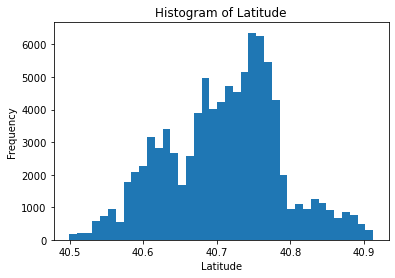

In [30]:
df['Latitude'].plot(kind='hist', bins=39, title="Histogram of Latitude")  
plt.xlabel('Latitude')

<AxesSubplot:ylabel='Frequency'>

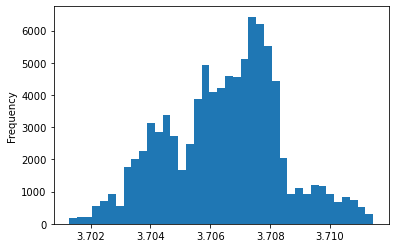

In [31]:
df['Latitude'].map(np.log).plot(kind='hist', bins=39)

## 2.8 Longitude

Text(0.5, 0, 'Longitude')

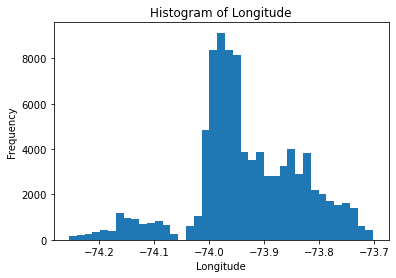

In [32]:
df['Longitude'].plot(kind='hist', bins=39, title="Histogram of Longitude")  
plt.xlabel('Longitude')

## 2.9 Match

Text(0.5, 0, 'Match')

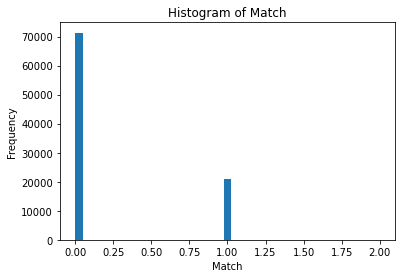

In [33]:
df['Match'].plot(kind='hist', bins=39, title="Histogram of Match")  
plt.xlabel('Match')

# 3. Correlation 

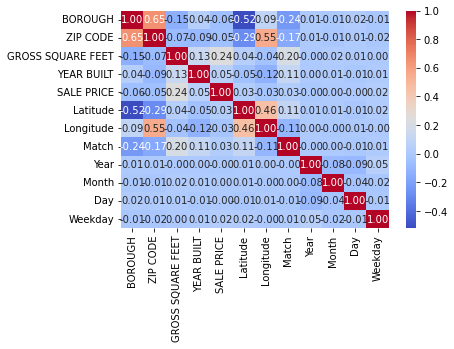

In [34]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# 4. Missing Values

## 4.1 SALE PRICE

* Consider the price smaller than $1000 as outliers.

In [35]:
outliers = df['SALE PRICE'] < 1000

In [36]:
df_no_outliers = df[~outliers]

* Impute using the median values of SALE PRICE by ZIP CODE.

In [37]:
medians_by_zip = df_no_outliers.groupby('ZIP CODE')['SALE PRICE'].median().reset_index()
medians_by_zip.columns = ['ZIP CODE', 'Median_Sale_Price']

In [38]:
df = pd.merge(df, medians_by_zip, on='ZIP CODE', how='left')

In [39]:
df.loc[outliers, 'SALE PRICE'] = df.loc[outliers, 'Median_Sale_Price']

In [40]:
df = df.drop(['Median_Sale_Price'], axis=1)

## 4.2 GROSS SQUARE FEET

* Using SALE PRICE to predict the missing values of GROSS SQUARE FEET.

In [42]:
outliers = df['GROSS SQUARE FEET'] < 10
outliers.sum()

1081

In [43]:
df['SALE PRICE'].isnull().sum()

12

In [44]:
df = df.dropna(subset=['SALE PRICE']) 

In [45]:
df['SALE PRICE'].isnull().sum()

0

* Try using different models and pick the one that works best.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df_nona = df.dropna(subset=['GROSS SQUARE FEET'])
len(df_nona)

48612

In [47]:
outliers = df['GROSS SQUARE FEET'] < 10
outliers.sum()

1081

In [48]:
df_clean = df_nona[~outliers].reset_index(drop=True)

/var/folders/rv/bklh4q_d2157rwx2l15fwmk40000gn/T/ipykernel_34975/1419139919.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_nona[~outliers].reset_index(drop=True)


In [49]:
len(df_clean)

47531

In [50]:
# Separate the dataset into features (X) and target variable (y)
X = df_clean[['SALE PRICE']].values.reshape(-1, 1)  # Features
y = df_clean['GROSS SQUARE FEET']  # Target variable

In [51]:
# Split the data into training and testing sets
train_raw = df_clean[df_clean['SALE DATE'] < '2022-10-15'].reset_index(drop=True)
test_raw = df_clean[df_clean['SALE DATE'] >= '2022-10-15'].reset_index(drop=True)

In [52]:
len(train_raw)

38563

In [53]:
len(test_raw)

8968

In [54]:
X_train = train_raw['SALE PRICE'].values.reshape(-1, 1)
y_train = train_raw['GROSS SQUARE FEET']

X_test = test_raw['SALE PRICE'].values.reshape(-1, 1)
y_test = test_raw['GROSS SQUARE FEET']

In [55]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the testing set
y_test_pred = model.predict(X_test)

# Evaluate the model
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
print('-------------------')
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 6.45e+03
train MSE: 1.33e+09
train R2: 0.059
-------------------
test MAE: 7.01e+03
test MSE: 1.66e+09
test R2: 0.060


In [56]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_model.predict(X_train)

# Predict on the testing set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
print('-------------------')
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 3.74e+03
train MSE: 6.43e+08
train R2: 0.546
-------------------
test MAE: 6.31e+03
test MSE: 1.77e+09
test R2: -0.000


In [57]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = xgb_model.predict(X_train)

# Predict on the testing set
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
print('-------------------')
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))


train MAE: 6.29e+03
train MSE: 1.32e+09
train R2: 0.067
-------------------
test MAE: 6.89e+03
test MSE: 1.68e+09
test R2: 0.046


* Tune random forest.

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
              'n_estimators': [50, 100, 200],
              'max_depth': [3, 6, 9, 20, 50, 100], #default is None, which means infinity
              'min_samples_leaf': [1, 3, 5, 10, 20],
              'min_samples_split': [2, 3, 5, 8]                
             }

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

In [59]:
# Predict on the training set
y_train_pred = best_rf_model.predict(X_train)

# Predict on the testing set
y_test_pred = best_rf_model.predict(X_test)

# Evaluate the model
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
print('-------------------')
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 6.19e+03
train MSE: 1.27e+09
train R2: 0.103
-------------------
test MAE: 6.76e+03
test MSE: 1.64e+09
test R2: 0.074


* Finally we choose Random Forest to impute the data.

In [62]:
missing_values = df['GROSS SQUARE FEET'].isnull()
outliers = df['GROSS SQUARE FEET'] < 10

In [67]:
X = df[['SALE PRICE']].values.reshape(-1, 1)

X_impute = X[missing_values | outliers]
y_impute = best_rf_model.predict(X_impute)

df.loc[missing_values | outliers, 'GROSS SQUARE FEET'] = y_impute

In [68]:
df['GROSS SQUARE FEET'].isnull().sum()

0

In [69]:
df['GROSS SQUARE FEET'].min()

30.0

In [70]:
df['GROSS SQUARE FEET'].max()

2400000.0

## 4.3 Latitude and Longitude

* Use ZIP CODE to impute Longitude first and then use Longitude to impute Latitude.

In [71]:
df_clean = df.dropna(subset=['Longitude'])

In [72]:
X = df_clean[['ZIP CODE']].values.reshape(-1, 1)  # Features
y = df_clean['Longitude']  # Target variable

train_raw = df_clean[df_clean['SALE DATE'] < '2022-10-15'].reset_index(drop=True)
test_raw = df_clean[df_clean['SALE DATE'] >= '2022-10-15'].reset_index(drop=True)

X_train = train_raw['ZIP CODE'].values.reshape(-1, 1)
y_train = train_raw['Longitude']

X_test = test_raw['ZIP CODE'].values.reshape(-1, 1)
y_test = test_raw['Longitude']

In [73]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the testing set
y_test_pred = model.predict(X_test)

# Evaluate the model
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
print('-------------------')
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 6.78e-02
train MSE: 6.95e-03
train R2: 0.301
-------------------
test MAE: 6.86e-02
test MSE: 7.12e-03
test R2: 0.302


In [75]:
missing_values = df['Longitude'].isnull()

X = df[['ZIP CODE']].values.reshape(-1, 1)

X_impute = X[missing_values]
y_impute = model.predict(X_impute)

df.loc[missing_values, 'Longitude'] = y_impute

In [77]:
df['Longitude'].isnull().sum()

0

* Use Longitude to impute Latitude.

In [79]:
df_clean = df.dropna(subset=['Latitude'])

In [80]:
X = df_clean[['Longitude']].values.reshape(-1, 1)  # Features
y = df_clean['Latitude']  # Target variable

train_raw = df_clean[df_clean['SALE DATE'] < '2022-10-15'].reset_index(drop=True)
test_raw = df_clean[df_clean['SALE DATE'] >= '2022-10-15'].reset_index(drop=True)

X_train = train_raw['Longitude'].values.reshape(-1, 1)
y_train = train_raw['Latitude']

X_test = test_raw['Longitude'].values.reshape(-1, 1)
y_test = test_raw['Latitude']

In [81]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the testing set
y_test_pred = model.predict(X_test)

# Evaluate the model
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
print('-------------------')
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 5.74e-02
train MSE: 4.78e-03
train R2: 0.209
-------------------
test MAE: 5.77e-02
test MSE: 4.83e-03
test R2: 0.219


In [82]:
missing_values = df['Latitude'].isnull()

X = df[['Longitude']].values.reshape(-1, 1)

X_impute = X[missing_values]
y_impute = model.predict(X_impute)

df.loc[missing_values, 'Latitude'] = y_impute

In [83]:
df['Latitude'].isnull().sum()

0

## 4.4 YEAR BUILT

* Since the missing values are around 5% of the total values. We use the most frequent year to impute.
* We also need to detect outliers before that.

In [85]:
Q1 = df['YEAR BUILT'].quantile(0.25)
Q3 = df['YEAR BUILT'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for considering values as outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

null_values = df['YEAR BUILT'].isnull()
outliers = (df['YEAR BUILT'] < lower_bound) | (df['YEAR BUILT'] > upper_bound)

most_frequent_value = df['YEAR BUILT'].mode()[0]
df.loc[null_values, 'YEAR BUILT'] = most_frequent_value
df.loc[outliers, 'YEAR BUILT'] = most_frequent_value

In [86]:
df['YEAR BUILT'].isnull().sum()

0

In [87]:
df['YEAR BUILT'].min()

1844.0

In [88]:
df['YEAR BUILT'].max()

2022.0

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92196 entries, 0 to 92207
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BOROUGH            92196 non-null  int64         
 1   ADDRESS            92196 non-null  object        
 2   ZIP CODE           92196 non-null  float64       
 3   GROSS SQUARE FEET  92196 non-null  float64       
 4   YEAR BUILT         92196 non-null  float64       
 5   SALE PRICE         92196 non-null  float64       
 6   SALE DATE          92196 non-null  datetime64[ns]
 7   Latitude           92196 non-null  float64       
 8   Longitude          92196 non-null  float64       
 9   Clean Address      92196 non-null  object        
 10  Match              92196 non-null  int64         
 11  Year               92196 non-null  int64         
 12  Month              92196 non-null  int64         
 13  Day                92196 non-null  int64         
 14  Weekda

In [90]:
df.to_csv('csv/clean_data.csv', index=False)